In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
redwine_dir = r'./data/winequality-red.csv'
whitewine_dir = r'./data/winequality-white.csv'
df_redwine = pd.read_csv(redwine_dir, sep=';')
df_whitewine= pd.read_csv(whitewine_dir, sep=';')

In [3]:
# O = redwine; 1= whitewine
df_redwine['wine_type'] = 0
df_whitewine['wine_type']= 1

In [4]:
df_whitewine.columns == df_redwine.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [5]:
len(df_whitewine.columns == df_redwine.columns)

13

In [6]:
merge_df = pd.concat([df_redwine,
                      df_whitewine],
                      axis = 0)
merge_df.drop('quality', axis = 1, inplace= True)
merge_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [7]:
merge_df.shape

(6497, 12)

In [8]:
merge_df['wine_type'].value_counts()

wine_type
1    4898
0    1599
Name: count, dtype: int64

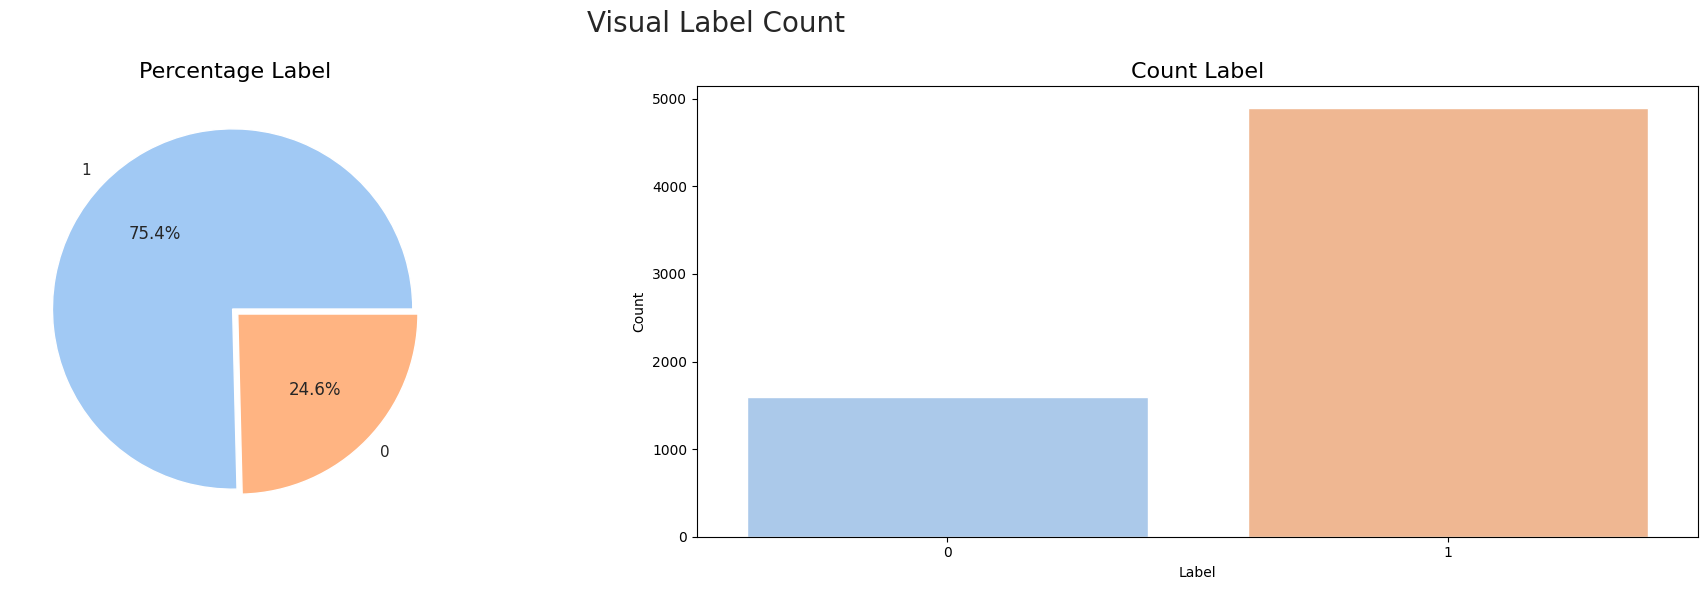

In [9]:
label_count = merge_df['wine_type'].value_counts()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

sns.set_theme(style='darkgrid', palette='pastel')
color = sns.color_palette(palette='pastel')
explode = [0.02]*len(label_count)

axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('Percentage Label',fontsize=16)

sns.barplot(x=label_count.index, y=label_count.values, ax=axes[1])
axes[1].set_title('Count Label',fontsize=16)
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')

fig.suptitle('Visual Label Count',fontsize=20)
plt.tight_layout()
plt.show()

In [10]:
merge_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [11]:
# Split x and y
x = merge_df.drop('wine_type', axis = 1)
y = merge_df['wine_type']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=20)

In [26]:


encoded = LabelEncoder()
sc = StandardScaler()

x_sc = sc.fit_transform(x_train)

df_sc = pd.DataFrame(x_sc, columns=x.columns)

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('XGB', XGBClassifier()))

result = []
names = []

for name, model in models:
    cvs = cross_val_score(model, x_sc, y_train, cv=10)
    result.append(cvs)
    names.append(name)
    print('{:4} {:.3f} {:.3f}'.format(name, cvs.mean(), cvs.std()))

KNN  0.994 0.002
LR   0.994 0.002
NB   0.976 0.007
GBC  0.994 0.003
SVC  0.996 0.002
RFC  0.995 0.002
DT   0.987 0.002
XGB  0.995 0.003


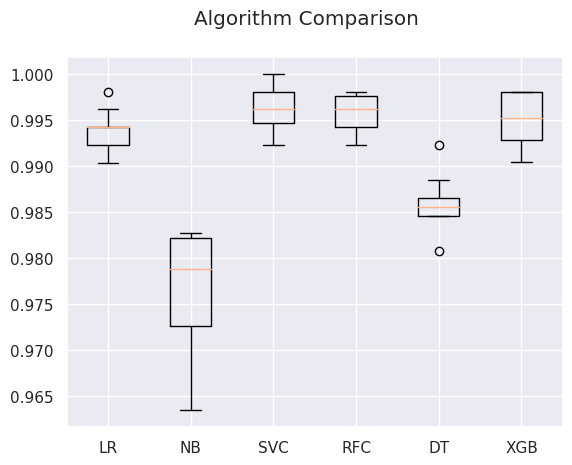

In [14]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

# GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 7], }

xgb = XGBClassifier()

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_sc, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Best Score: 0.9969212260309469


In [16]:
model = grid_search.best_estimator_
cvs = cross_val_score(model,x_sc,y_train,cv=10)
print('Cross val score:{}'.format(cvs.round(2)))
print('Average {:.2f} %'.format(cvs.mean()*100))

Cross val score:[1.   1.   1.   1.   0.99 1.   1.   1.   1.   0.99]
Average 99.67 %


# RandomizedSearchCV

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  
    'learning_rate': np.linspace(0.01, 0.2, 20),  
    'max_depth': [3, 5, 7, 9],  }

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)
random_search.fit(x_sc, y_train)

print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Hyperparameters: {'n_estimators': 700, 'max_depth': 3, 'learning_rate': 0.13}
Best Score: 0.9971137188124676


In [29]:
model = random_search.best_estimator_
cvs = cross_val_score(model,x_sc,y_train,cv=10)
print('Cross val score:{}'.format(cvs.round(2)))
print('Average {:.2f} %'.format(cvs.mean()*100))

Cross val score:[1.   1.   0.99 1.   0.99 1.   1.   1.   1.   0.99]
Average 99.65 %


In [19]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.16, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Classification

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report

pipe1 = Pipeline([
    ('scaler',StandardScaler()),
    ('xgb',XGBClassifier(n_estimators= 500, max_depth=5, learning_rate=0.13))
])

pipe1.fit(x_train,y_train)
y_pred = pipe1.predict(x_test)

print('Accuracy Train: {:.2f}'.format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

Accuracy Train: 0.99
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       321
           1       0.99      1.00      0.99       979

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300

